<a href="https://colab.research.google.com/github/dsynderg/479_Final_Project/blob/main/10_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/rhodes-byu/cs-stat-180/blob/main/labs/10-mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><p><b>After clicking the "Open in Colab" link, copy the notebook to your own Google Drive before getting started, or it will not save your work</b></p>

# BYU CS 180 Lab 10: MLP and Backprop

In this lab, you will create and train a simple deep neural network. You will implement a simple DNN using the scikit-learn MLPClassifier to perform classification on the following weather dataset. Use the 'Rain' feature as the target.

Here is the documentation for the Scikit-Learn MLP Classifier
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [70]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
# Install kagglehub if not already installed. Uncomment and run the line below if needed.
!pip install kagglehub

In [72]:
# Load in data
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zeeshier/weather-forecast-dataset")
print(path)
df = pd.read_csv(f'{path}/weather_forecast_data.csv')
np.random.seed(42)

/root/.cache/kagglehub/datasets/zeeshier/weather-forecast-dataset/versions/1


In [73]:
df.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


## Task 1
Perform a simple exploratory analysis on the data (plot the distribution of rain vs. no rain cases, get counts for features/observations, etc.). Then split the data into a train and test set (70% / 30%), using the 'Rain' column as your target. Stratify your split. Apply any required data preparations or transformations.

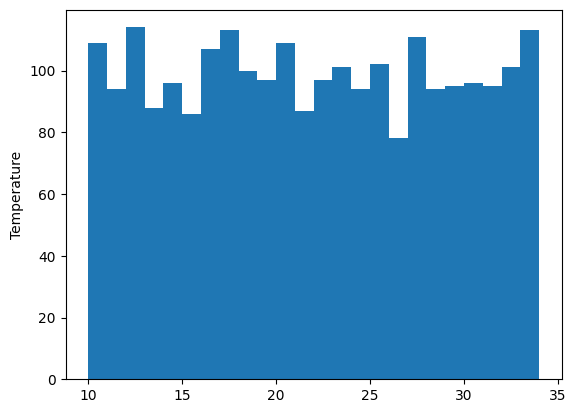

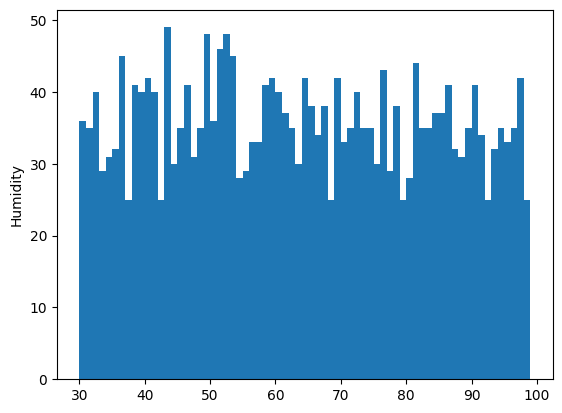

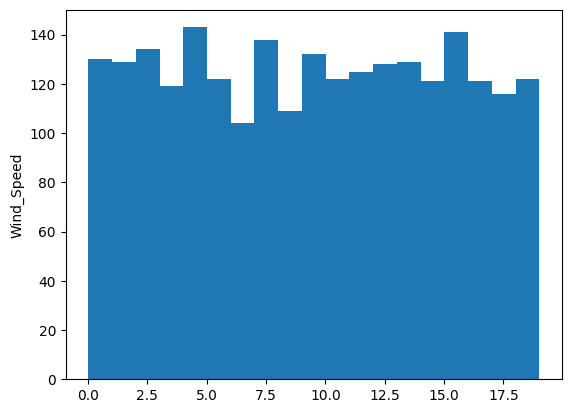

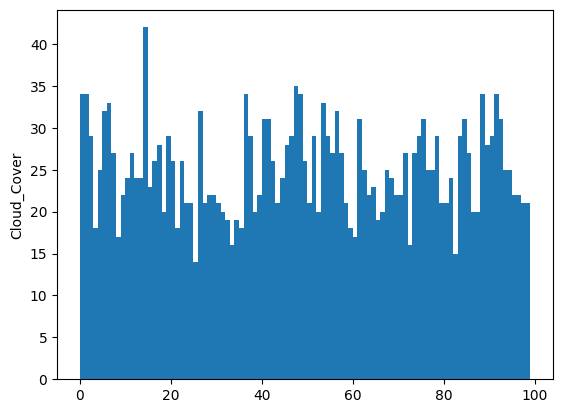

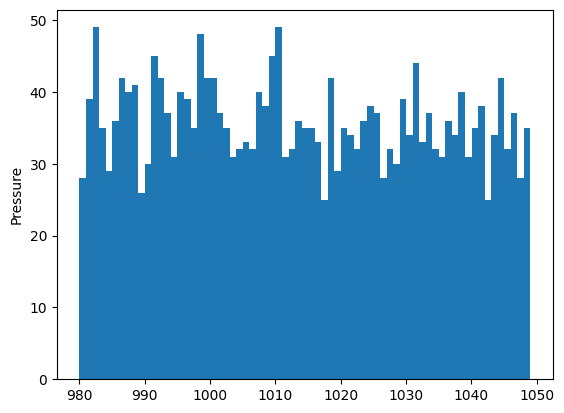

TypeError: arange() not supported for inputs with DType <class 'numpy.dtypes.StrDType'>.

In [74]:
# bins = [10,20,30,40,50,60,70,80,90,100]
bins=[]
for i in range(100):
  bins.append(i)
for col in df.columns:

  plt.hist(df[col],bins = np.arange(df[col].min(),df[col].max(),1))
  plt.ylabel(col)
  plt.show()
  plt.clf

(array([ 314.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2186.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

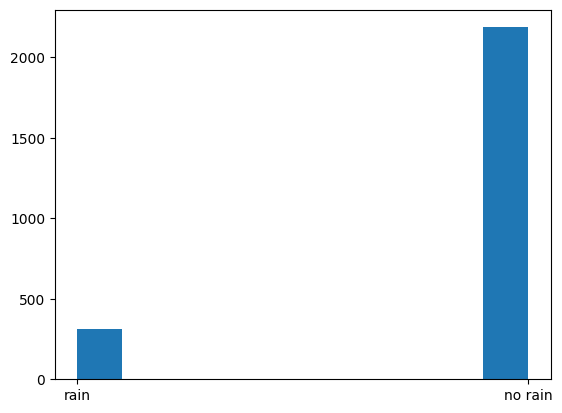

In [75]:
# TODO: Simple EDA
plt.hist(df['Rain'])

In [96]:
# TODO: Split Data into train and test
rainDB = df[df['Rain']=="rain"]
print(len(rainDB))
norainDB = df[df['Rain']=="no rain"]
print(len(norainDB))
noRainAdjusted = norainDB[:314]
print(len(noRainAdjusted))
combinedBalenced = pd.concat([rainDB,noRainAdjusted],ignore_index=True)
print(len(combinedBalenced))
rainDB.head()

314
2186
314
628


,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
9,19.586038,82.978293,5.760537,98.014450,1036.503457,rain
11,23.222373,76.877943,15.825673,72.869790,980.108934,rain
16,10.505460,75.456091,14.797331,99.142331,1011.577194,rain


In [98]:
from sklearn import random
combinedBalenced = combinedBalenced.sample(frac=1,random_state=1).reset_index(drop=True)
combinedBalenced.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,15.422425,95.736700,3.669602,1.273860,1035.095575,no rain
1,11.588844,74.497408,16.884958,75.828519,982.923828,rain
2,20.437159,78.222938,11.145001,69.311702,1036.408842,rain
3,19.710103,98.306258,15.337774,80.031557,990.205158,rain
4,16.348541,72.635552,12.200022,42.062582,982.409062,no rain


In [99]:
x = combinedBalenced.drop('Rain',axis = 1)
y = combinedBalenced['Rain']
x.head()
y.head()

,Rain
0,no rain
1,rain
2,rain
3,rain
4,no rain


In [100]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, stratify=y, random_state=42
)

Suppose you are performing this analysis for a farmer who's work heavily depends on knowing if and when it is going to rain.  Based on your EDA, what metric or metrics would you focus on to evaluate your model?  Why?

becasue i have fixed the sampling distrobution, accuracy would be fine, but precision would probably be better because we want to know he wants to know more about when its going to rain.

## Task 2
Your next task is to experiment with various MLP architectures to find an optimal model. This will require playing around with different numbers and sizes of hidden layers, trying different activation functions, and finding other hyperparameters to play around with. Use the metric chosen in Task 1 on your test set as your evaluation metric.

In [101]:
# TODO: Build and fit a simple MLP
mlp = MLPClassifier()
mlp.fit(X_train,y_train)

# TODO: Test different architectures (adjust the 'hidden_layer_sizes' value)
mlphiddenlayer = MLPClassifier(hidden_layer_sizes=(3,3))
mlphiddenlayer.fit(X_train,y_train)
# TODO: Test different activation functions
mlpActivation = MLPClassifier(activation="logistic")
mlpActivation.fit(X_train,y_train)

MLPClassifier(activation='logistic')

In [81]:
from sklearn.metrics import precision_score



In [102]:
regular = mlp.predict(X_test)
hidden = mlphiddenlayer.predict(X_test)
activaiton = mlpActivation.predict(X_test)

In [83]:
print(len(hidden))

750


In [103]:

regPrecision = precision_score(y_test, regular, pos_label ='rain')
hidPrecision = precision_score(y_test, hidden, pos_label ='rain')
actPrecision = precision_score(y_test, activaiton, pos_label ='rain')

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [104]:
print(f"Regular MLP Precision: {regPrecision}")
print(f"Hidden Layer MLP Precision: {hidPrecision}")
print(f"Activation MLP Precision: {actPrecision}")

Regular MLP Precision: 0.8476190476190476
Hidden Layer MLP Precision: 0.0
Activation MLP Precision: 0.8317757009345794


What number of hidden layers worked best for you? What size were they? Why do you think this architecture worked better than others?
After running, the best architecture seems to be the default number of hidden layers with an activation function of logistic


Briefly read into the different activation functions and what makes each one unique. Which one worked best for you? Why do you think that is?

## Task 3
a) Fit a random forest and logistic regression to this same dataset. See how their performance compares to your best MLP. These libaries are already imported. Documentation can be found at the following links.

- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [109]:
# TODO: Implement random forest
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_predict = rf.predict(X_test)
print(precision_score(y_test,y_predict,pos_label="no rain"))

1.0


In [112]:
# TODO: Implement logistic regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train,y_train)
y_predict = rf.predict(X_test)
print(precision_score(y_test,y_predict,pos_label="no rain"))
print(y_predict)

1.0
['no rain' 'no rain' 'no rain' 'no rain' 'no rain' 'no rain' 'rain'
 'no rain' 'no rain' 'rain' 'no rain' 'rain' 'rain' 'rain' 'no rain'
 'rain' 'no rain' 'rain' 'rain' 'rain' 'rain' 'no rain' 'rain' 'rain'
 'no rain' 'no rain' 'no rain' 'no rain' 'no rain' 'rain' 'no rain' 'rain'
 'no rain' 'rain' 'rain' 'no rain' 'no rain' 'rain' 'rain' 'rain' 'rain'
 'rain' 'rain' 'rain' 'rain' 'no rain' 'no rain' 'rain' 'rain' 'rain'
 'no rain' 'rain' 'no rain' 'no rain' 'no rain' 'rain' 'no rain' 'rain'
 'rain' 'no rain' 'rain' 'no rain' 'no rain' 'no rain' 'rain' 'no rain'
 'rain' 'rain' 'no rain' 'no rain' 'no rain' 'rain' 'rain' 'rain'
 'no rain' 'rain' 'no rain' 'no rain' 'no rain' 'rain' 'no rain' 'rain'
 'no rain' 'rain' 'rain' 'no rain' 'no rain' 'no rain' 'no rain' 'no rain'
 'rain' 'no rain' 'no rain' 'rain' 'rain' 'rain' 'no rain' 'rain' 'rain'
 'no rain' 'no rain' 'rain' 'no rain' 'no rain' 'rain' 'rain' 'no rain'
 'no rain' 'no rain' 'no rain' 'rain' 'rain' 'rain' 'no rain' 'no rai

b) For each model, determine a measure of variable importance. For the random forest, you can use the feature importances_ attribute. For the logistic regression, you can use the absolute value of the coefficients. For the MLP, you can use permutation importance (see documentation below).

[Permutation Importance](https://scikit-learn.org/stable/modules/permutation_importance.html)

In [128]:
# TODO: Feature importances here
print(rf.feature_importances_)
print(np.abs(logreg.coef_[0]))

[0.21381027 0.41566368 0.01329065 0.34624795 0.01098745]
[0.21165212 0.13073207 0.02666918 0.08124465 0.00027533]


In [116]:
from sklearn.inspection import permutation_importance


In [130]:
permutation_importance(mlpActivation,X_test,y_test)['importances_mean']

array([0.03597884, 0.15661376, 0.00529101, 0.17037037, 0.00529101])

c) For each set of importances, plot the feature importances using a bar plot, sorted by importance. Include each of the three plots in a single figure with three subplots. (Note: the three sets of scores will be on different scales)

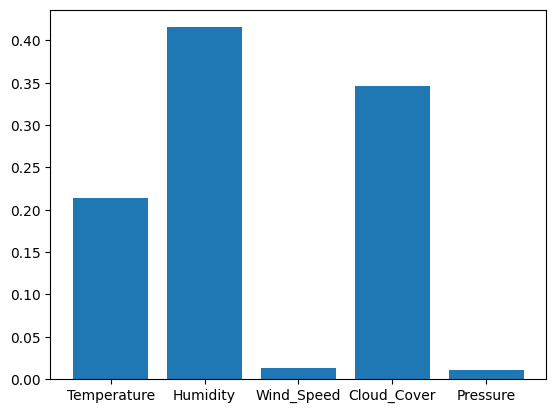

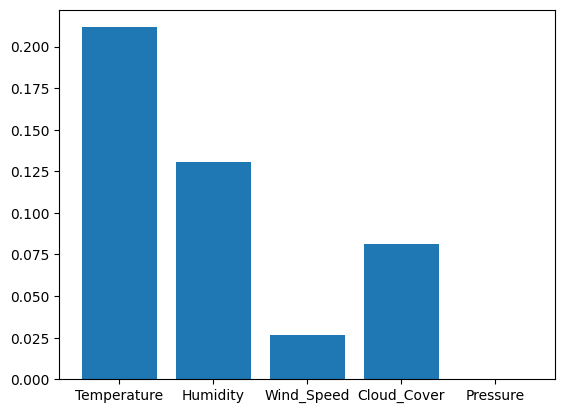

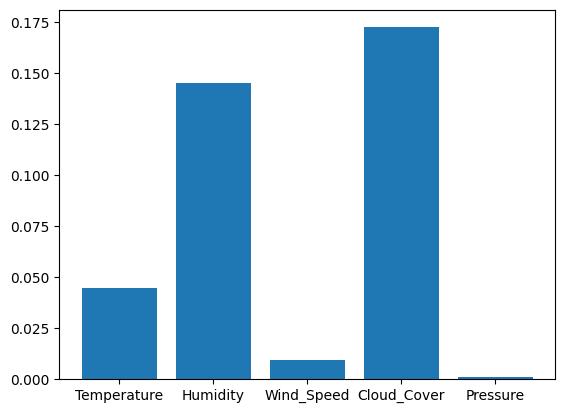

In [136]:
# TODO: Plot feature importances here
xgraph = [1,2,3,4,5]
plt.bar(X_test.columns,rf.feature_importances_)
plt.show()
# plt.xlabel("feature")
plt.clf
plt.bar(X_test.columns,np.abs(logreg.coef_[0]))
# plt.xlabel("feature")
plt.show()
plt.clf
plt.bar(X_test.columns,permutation_importance(mlpActivation,X_test,y_test)['importances_mean'])
plt.show()
# plt.xlabel("feature")
# plt.clf

How does the MLP compare to Logistic Regression and Random Forest?

Honestly, they are all incredibly differnt. random forest focuses most on humidity, Lr focuses on temperature, and the perceptron focuses on cloud_cover


Do the feature importances agree between the models? Do the importances intuitively make sense? Explain.

None of them agree which dosn't really make sense to me. You would think that they would all agree, but they don't. But because the way each of the models clasify, I would assume that they would find differnet patterns in the data.

What are the tradeoffs between model complexity and model interpretability?

As complexcity increases the interpretability the interpretablitiy decreases. When you increase the number of hidden layers, figuring out why the model says what it says becomes increasingly difficult